[reference](https://towardsdatascience.com/crime-rate-prediction-using-facebook-prophet-5348e21273d)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/data/country_vaccinations.csv")

In [ ]:
df.shape

(28158, 15)

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


In [ ]:
df.isnull().any()

country                                False
iso_code                               False
date                                   False
total_vaccinations                      True
people_vaccinated                       True
people_fully_vaccinated                 True
daily_vaccinations_raw                  True
daily_vaccinations                      True
total_vaccinations_per_hundred          True
people_vaccinated_per_hundred           True
people_fully_vaccinated_per_hundred     True
daily_vaccinations_per_million          True
vaccines                               False
source_name                            False
source_website                         False
dtype: bool

In [ ]:
df.drop(['iso_code', 'daily_vaccinations_raw', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
              'daily_vaccinations_per_million','source_name','source_website'],
        axis = 1,
        inplace=True)

In [ ]:
df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
1,Afghanistan,2021-02-23,NaN,NaN,NaN,1367.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
2,Afghanistan,2021-02-24,NaN,NaN,NaN,1367.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
3,Afghanistan,2021-02-25,NaN,NaN,NaN,1367.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
4,Afghanistan,2021-02-26,NaN,NaN,NaN,1367.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"


In [ ]:
newdf = df[df.country == "Thailand"]
newdf.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines
25346,Thailand,2021-02-27,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Sinovac"
25347,Thailand,2021-02-28,NaN,NaN,NaN,160.0,"Oxford/AstraZeneca, Sinovac"
25348,Thailand,2021-03-01,319.0,319.0,NaN,160.0,"Oxford/AstraZeneca, Sinovac"
25349,Thailand,2021-03-02,7262.0,7262.0,NaN,2421.0,"Oxford/AstraZeneca, Sinovac"
25350,Thailand,2021-03-03,NaN,NaN,NaN,2639.0,"Oxford/AstraZeneca, Sinovac"


In [ ]:
newdf.dropna()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines
25371,Thailand,2021-03-24,102050.0,96188.0,5862.0,4383.0,"Oxford/AstraZeneca, Sinovac"
25377,Thailand,2021-03-30,180477.0,151413.0,29064.0,11830.0,"Oxford/AstraZeneca, Sinovac"
25379,Thailand,2021-04-01,204642.0,167235.0,37407.0,12789.0,"Oxford/AstraZeneca, Sinovac"
25380,Thailand,2021-04-02,231882.0,189666.0,42216.0,14813.0,"Oxford/AstraZeneca, Sinovac"
25381,Thailand,2021-04-03,244254.0,201864.0,42390.0,14713.0,"Oxford/AstraZeneca, Sinovac"
...,...,...,...,...,...,...,...
25464,Thailand,2021-06-25,8981478.0,6435308.0,2546170.0,214056.0,"Oxford/AstraZeneca, Sinovac"
25465,Thailand,2021-06-26,9055141.0,6475826.0,2579315.0,209709.0,"Oxford/AstraZeneca, Sinovac"
25466,Thailand,2021-06-27,9147513.0,6537852.0,2609661.0,209779.0,"Oxford/AstraZeneca, Sinovac"
25467,Thailand,2021-06-28,9416972.0,6721038.0,2695394.0,215754.0,"Oxford/AstraZeneca, Sinovac"


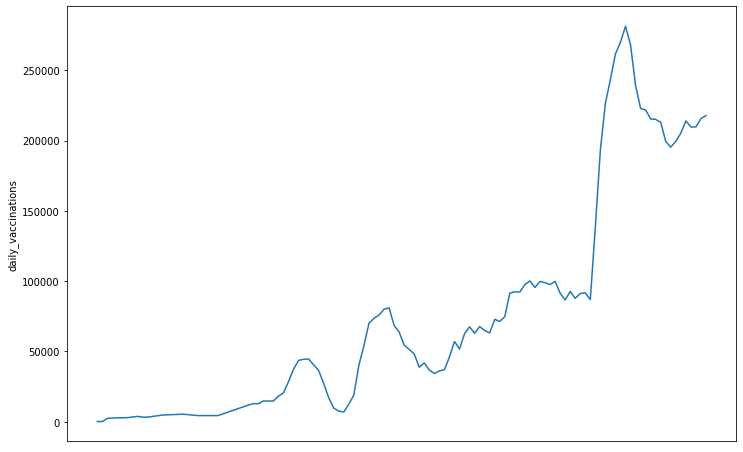

In [ ]:
fig = plt.figure(figsize = (12, 8))
plt.plot(newdf['date'], newdf['daily_vaccinations'])
# plt.xticks(rotation = 45)
plt.xlabel('date')
plt.ylabel('daily_vaccinations')
plt.gca().axes.get_xaxis().set_visible(False)

In [ ]:
df_prophet = newdf[['date', 'daily_vaccinations']]
df_prophet = df_prophet.rename(columns = {'date': 'ds', 'daily_vaccinations': 'y'})

In [ ]:
df_prophet.dropna()

,ds,y
25347,2021-02-28,160.0
25348,2021-03-01,160.0
25349,2021-03-02,2421.0
25350,2021-03-03,2639.0
25351,2021-03-04,2770.0
...,...,...
25464,2021-06-25,214056.0
25465,2021-06-26,209709.0
25466,2021-06-27,209779.0
25467,2021-06-28,215754.0


In [ ]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods = 15)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-27,-14729.707648,-47140.256867,18391.394608,-14729.707648,-14729.707648,-259.381839,-259.381839,-259.381839,-259.381839,-259.381839,-259.381839,0.0,0.0,0.0,-14989.089487
1,2021-02-28,-13688.215201,-50699.646387,22708.286486,-13688.215201,-13688.215201,-706.335797,-706.335797,-706.335797,-706.335797,-706.335797,-706.335797,0.0,0.0,0.0,-14394.550999
2,2021-03-01,-12646.722755,-50852.260225,21865.209073,-12646.722755,-12646.722755,-684.361205,-684.361205,-684.361205,-684.361205,-684.361205,-684.361205,0.0,0.0,0.0,-13331.083960
3,2021-03-02,-11605.230309,-48496.565713,23461.846005,-11605.230309,-11605.230309,-699.302397,-699.302397,-699.302397,-699.302397,-699.302397,-699.302397,0.0,0.0,0.0,-12304.532706
4,2021-03-03,-10563.737862,-45179.892815,26335.056437,-10563.737862,-10563.737862,513.373314,513.373314,513.373314,513.373314,513.373314,513.373314,0.0,0.0,0.0,-10050.364548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2021-07-10,277487.258396,240980.224729,310001.948092,275930.050395,279106.793977,-259.381839,-259.381839,-259.381839,-259.381839,-259.381839,-259.381839,0.0,0.0,0.0,277227.876557
134,2021-07-11,281211.831977,244006.240733,314189.402747,279389.174803,283162.984010,-706.335797,-706.335797,-706.335797,-706.335797,-706.335797,-706.335797,0.0,0.0,0.0,280505.496179
135,2021-07-12,284936.405558,248401.570155,320193.435367,282854.126210,287098.839510,-684.361205,-684.361205,-684.361205,-684.361205,-684.361205,-684.361205,0.0,0.0,0.0,284252.044353
136,2021-07-13,288660.979139,252675.171945,326696.239037,286314.433276,291091.788259,-699.302397,-699.302397,-699.302397,-699.302397,-699.302397,-699.302397,0.0,0.0,0.0,287961.676742


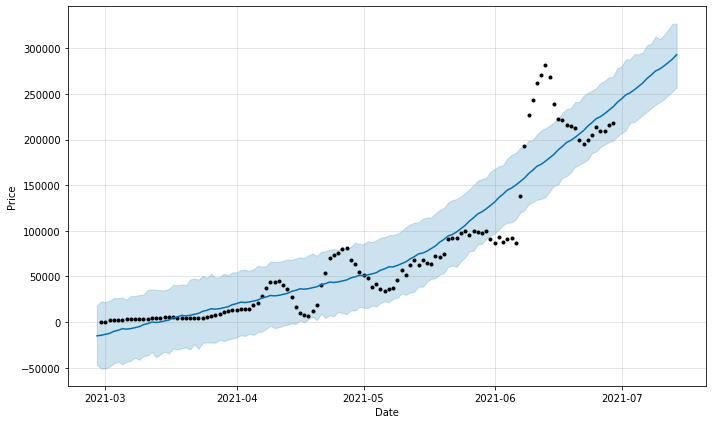

In [ ]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

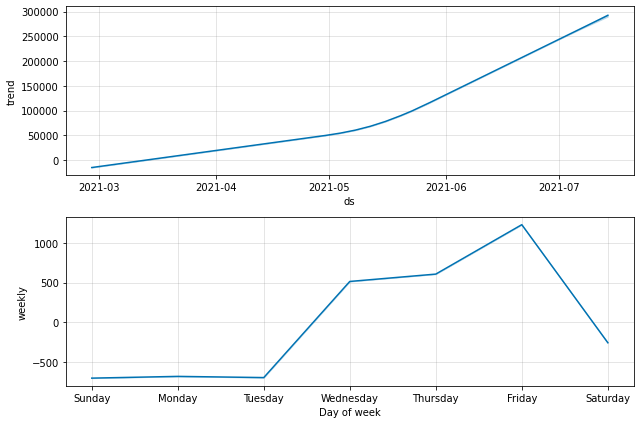

In [ ]:
figure = m.plot_components(forecast)